# 机器学习知识复习

## 单变量线性回归

###  导入库

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据

In [248]:
file_path = "studentscores.csv"
df = pd.read_csv(file_path)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [249]:
df.shape

(25, 2)

### 数据可视化 

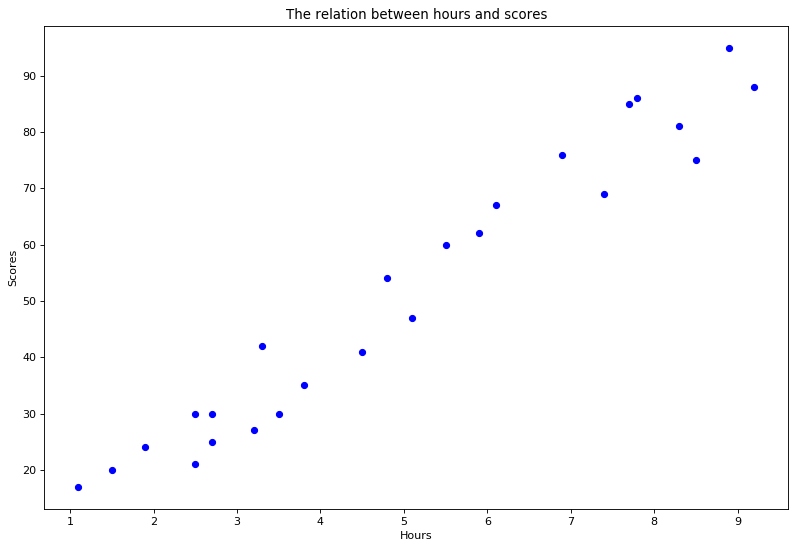

In [250]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df["Hours"], df["Scores"], s=30, c='b', marker='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("The relation between hours and scores")
plt.show()

### 训练集、测试集的划分 （7:3）

In [133]:
df.insert(0, "Ones", 1)
df.head()

,Ones,Hours,Scores
0,1,2.5,21
1,1,5.1,47
2,1,3.2,27
3,1,8.5,75
4,1,3.5,30


In [171]:
X_train = df.iloc[0:17, 0:2].values
y_train = df.iloc[0:17, 2:3].values
print(X_train)
print(y_train)
print(X_train.shape)
X_test = df.iloc[17:, 0:2].values
y_test = df.iloc[17:, 2:3].values
X_test.shape[0]

[[1.  2.5]
 [1.  5.1]
 [1.  3.2]
 [1.  8.5]
 [1.  3.5]
 [1.  1.5]
 [1.  9.2]
 [1.  5.5]
 [1.  8.3]
 [1.  2.7]
 [1.  7.7]
 [1.  5.9]
 [1.  4.5]
 [1.  3.3]
 [1.  1.1]
 [1.  8.9]
 [1.  2.5]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]]
(17, 2)


8

### 代价函数
$$
J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\theta(x^{(i)})-y^{(i)})}^2
$$

In [172]:
def cost(X, y, theta):
    J = np.dot((np.dot(X_train, theta) - y_train).T , (np.dot(X_train, theta) - y_train))/(2 * X.shape[0])
    return J

###  梯度下降

In [173]:
# 定义单次梯度下降时，theta的迭代
# 从这里以后的矩阵乘法我都用的.dot()，直接用*会出错不知道为什么
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    # theta有几个就更新几次
    for i in range(len(theta.ravel())):
            grad[i, 0] = np.dot(X[:, i].T, np.dot(X, theta) - y)/X.shape[0]
    return grad

In [174]:
# 定义迭代次数，每次更新gradient
def descent(X, y, theta, alpha, nums_iters):
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)]
    for i in range(nums_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        costs.append(cost(X, y, theta))
    return theta, costs, grad

### 设置参数求解 

In [239]:
theta = np.array([[0], [0]])
# theta.shape

In [240]:
# for i in range(len(theta.ravel())):
#     print(i)

In [241]:
theta, costs, grad = descent(X_train, y_train, theta, alpha=0.00005, nums_iters=5000)

### 迭代循环过程中代价函数的可视化 

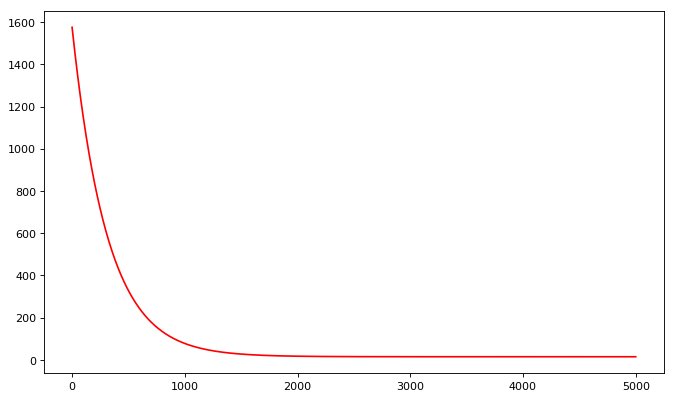

In [242]:
# 这里我用了一个强制转换，要不然costs是一个多维的数组
from itertools import chain
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(len(costs)), list(chain.from_iterable(costs)), 'r')

###  训练结果的可视化 

In [243]:
grad

array([[-0.15836553],
       [-0.07942894]])

In [244]:
theta

array([[1.58207715],
       [9.73078596]])

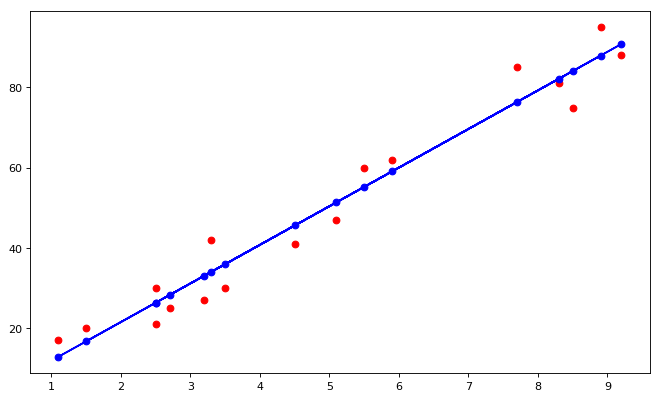

In [213]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_train[:, 1], y_train, color = 'red')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'bo-')

### 测试结果的可视化

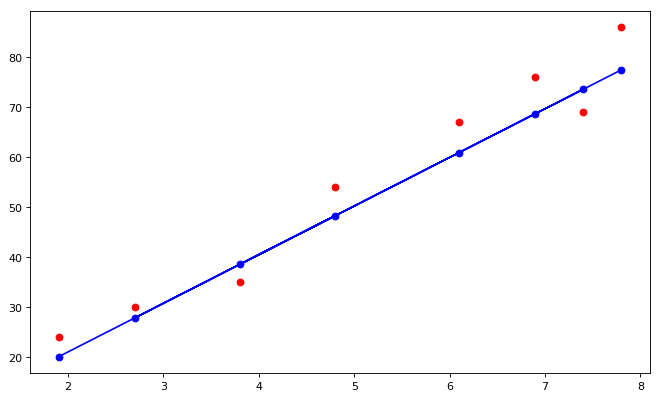

In [246]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_test[:, 1], y_test, color = 'red')
plt.plot(X_test[:, 1], np.dot(X_test, theta), 'bo-')

## 多变量线性回归 

### 导入库 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据 

In [2]:
file_path = "50_Startups.csv"
df = pd.read_csv(file_path)
state_data = df.loc[:, "State"].copy()  # 这里如果不使用copy命令会修改原始数据，报错
state_data[state_data == "New York"] = 0
state_data[state_data == "California"] = 1
state_data[state_data == "Florida"] = 2
# print(state_data)
df.drop(["State"],axis=1,inplace=True)  # 这里我暂时还不能处理“State”这个未被数据化的特征，故我先把它删除了
df.insert(3, "State", state_data)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [3]:
df.shape

(50, 5)

### 特征缩放 

In [4]:
#特征缩放
def featureNormalize(X):
    X_norm = X;
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    for i in range(X.shape[1]):
        mu[0,i] = np.mean(X.iloc[:,i]) # 均值
        sigma[0,i] = np.std(X.iloc[:,i])     # 标准差
#     print(mu)
#     print(sigma)
    X_norm  = (X - mu) / sigma
    return X_norm,mu,sigma

In [5]:
x, mu, sigma = featureNormalize(df)

In [6]:
print(x)

    R&D Spend  Administration  Marketing Spend      State    Profit
0    2.016411        0.560753         2.153943   -1.20666  2.011203
1    1.955860        1.082807         1.923600  0.0246258  1.999430
2    1.754364       -0.728257         1.626528    1.25591  1.980842
3    1.554784       -0.096365         1.422210   -1.20666  1.776627
4    1.504937       -1.079919         1.281528    1.25591  1.357740
5    1.279800       -0.776239         1.254210   -1.20666  1.127250
6    1.340066        0.932147        -0.688150  0.0246258  1.105481
7    1.245057        0.871980         0.932186    1.25591  1.096210
8    1.030369        0.986952         0.830887   -1.20666  1.007470
9    1.091819       -0.456640         0.776107  0.0246258  0.946022
10   0.620398       -0.387599         0.149807    1.25591  0.854847
11   0.593085       -1.065540         0.319834  0.0246258  0.808168
12   0.443260        0.215449         0.320617    1.25591  0.741155
13   0.402078        0.510179         0.343957  

In [7]:
print(mu)

[[7.37216156e+04 1.21344640e+05 2.11025098e+05 9.80000000e-01
  1.12012639e+05]]


In [8]:
print(sigma)

[[4.54409156e+04 2.77362097e+04 1.21061231e+05 8.12157620e-01
  3.99010828e+04]]


In [9]:
x.insert(0, "Ones", 1)
x.head()

,Ones,R&D Spend,Administration,Marketing Spend,State,Profit
0,1,2.016411,0.560753,2.153943,-1.20666,2.011203
1,1,1.955860,1.082807,1.923600,0.0246258,1.999430
2,1,1.754364,-0.728257,1.626528,1.25591,1.980842
3,1,1.554784,-0.096365,1.422210,-1.20666,1.776627
4,1,1.504937,-1.079919,1.281528,1.25591,1.357740


### 训练集和测试集的划分 

In [10]:
X_train = x.iloc[0:38, 0:5].values
y_train = x.iloc[0:38, 5:6].values
X_test = x.iloc[38:, 0:5].values
y_test = x.iloc[38:, 5:6].values
print(X_train)

[[1 2.016411493158463 0.560752914530775 2.153943088571744
  -1.2066623222657376]
 [1 1.9558603364325031 1.0828065830760816 1.9236003956421444
  0.024625761678892626]
 [1 1.7543637361407838 -0.728257027688616 1.6265276693147561
  1.2559138456235228]
 [1 1.5547836905426 -0.09636463069766506 1.4222102362410112
  -1.2066623222657376]
 [1 1.5049372036935103 -1.0799193536742715 1.2815277086174908
  1.2559138456235228]
 [1 1.2798000145910104 -0.7762390705391569 1.254210457936233
  -1.2066623222657376]
 [1 1.3400664059278973 0.932147208470259 -0.6881499302965385
  0.024625761678892626]
 [1 1.245056656530228 0.8719800111141446 0.9321859780995744
  1.2559138456235228]
 [1 1.0303688607579797 0.9869521013922115 0.8308869091888104
  -1.2066623222657376]
 [1 1.0918192071128048 -0.45664024606220516 0.7761074398639789
  0.024625761678892626]
 [1 0.6203982479442909 -0.387599089246799 0.14980726713928444
  1.2559138456235228]
 [1 0.5930854179840064 -1.0655395950477577 0.3198336232146925
  0.024625761678

### 代价函数 

In [11]:
def cost(X, y, theta):
    J = np.dot((np.dot(X_train, theta) - y_train).T , (np.dot(X_train, theta) - y_train))/(2 * X.shape[0])
    return J

### 梯度下降 

In [12]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    # theta有几个就更新几次
    for i in range(len(theta.ravel())):
            grad[i, 0] = np.dot(X[:, i].T, np.dot(X, theta) - y)/X.shape[0]
    return grad

In [13]:
def descent(X, y, theta, alpha, nums_iters):
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)]
    for i in range(nums_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        costs.append(cost(X, y, theta))
    return theta, costs, grad

### 初始化参数求解 

In [14]:
theta = np.array([[0], [0], [0], [0], [0]])
theta.shape

(5, 1)

In [15]:
theta, costs, grad = descent(X_train, y_train, theta, alpha=0.005, nums_iters=5000)

### 迭代循环过程中代价函数的可视化 

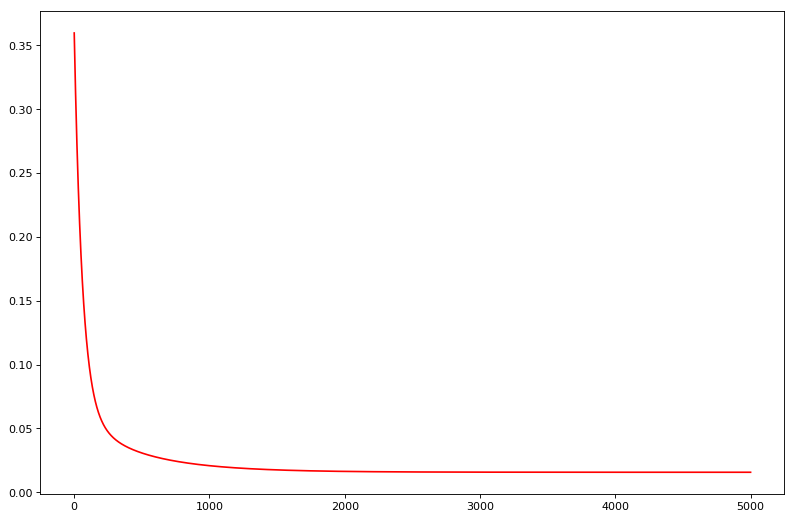

In [16]:
from itertools import chain
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(np.arange(len(costs)), list(chain.from_iterable(costs)), 'r')

### 训练结果的可视化  

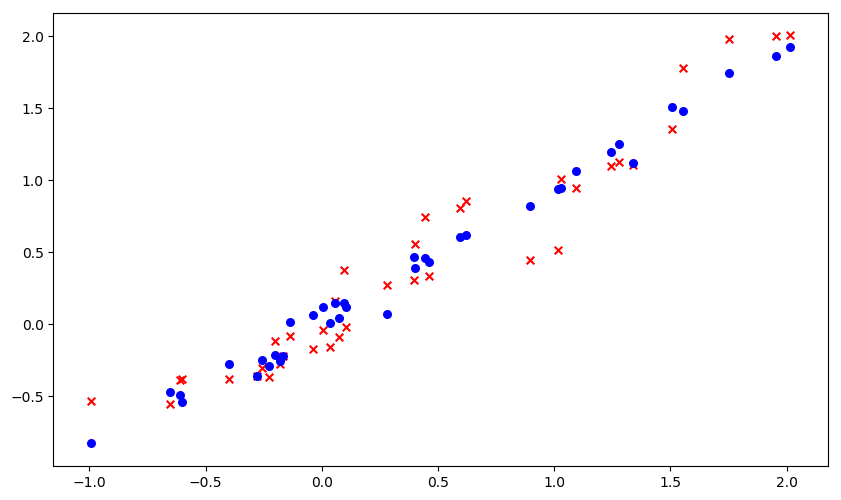

In [17]:
# print(np.dot(X_train, theta))
# print(y_train)
# print(np.hstack((np.dot(X_train, theta), y_train)))
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_train[:, 1], y_train, s=30, c='r', marker='x')
plt.scatter(X_train[:, 1], np.dot(X_train, theta), s=30, c='b', marker='o')
# plt.plot(X_train[:, 1], np.dot(X_train, theta), 'bo-')

### 测试结果的可视化  

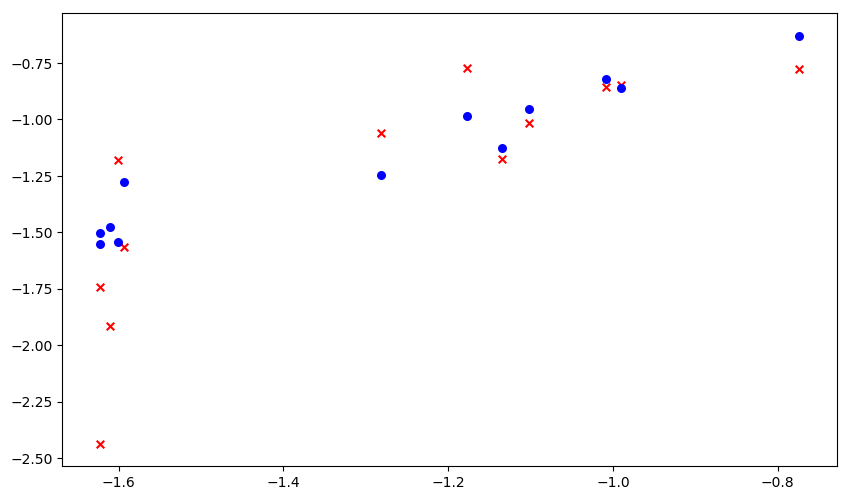

In [145]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_test[:, 1], y_test, s=30, c='r', marker='x')
plt.scatter(X_test[:, 1], np.dot(X_test, theta), s=30, c='b', marker='o')